<a href="https://colab.research.google.com/github/Dhanush7-8/Fake-News-Detection-Using-BERT/blob/main/group_2_fake_news_detection_using_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install transformers

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

In [ ]:
fake_data=pd.read_csv("/content/News Dataset/Fake.csv")
real_data=pd.read_csv("/content/News Dataset/True.csv")

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


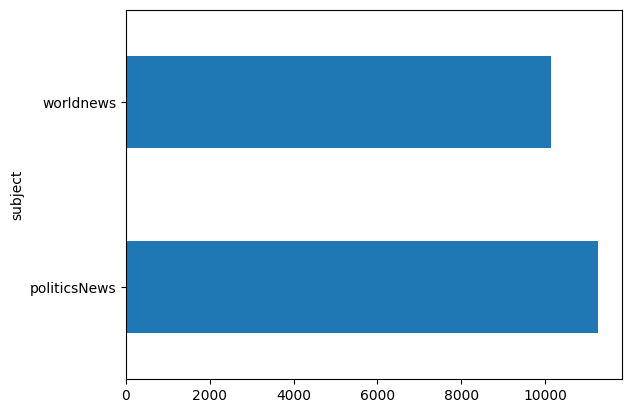

In [ ]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

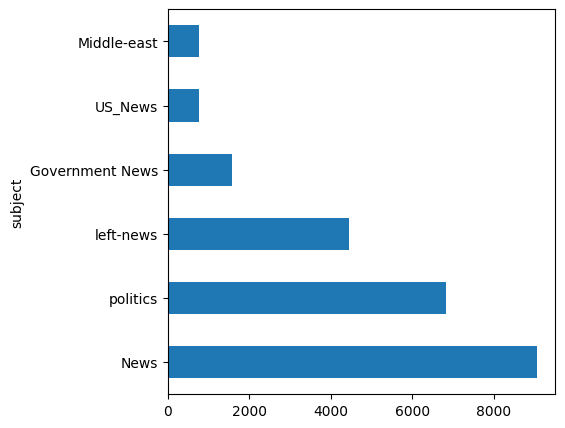

In [ ]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

WORLDCLOUD REAL TEXT DATA

In [ ]:
wordcld_mask=np.array(Image.open("/content/News Dataset/twitter.png"))

In [ ]:
wordcld_text=" ".join(real_data["text"].tolist())

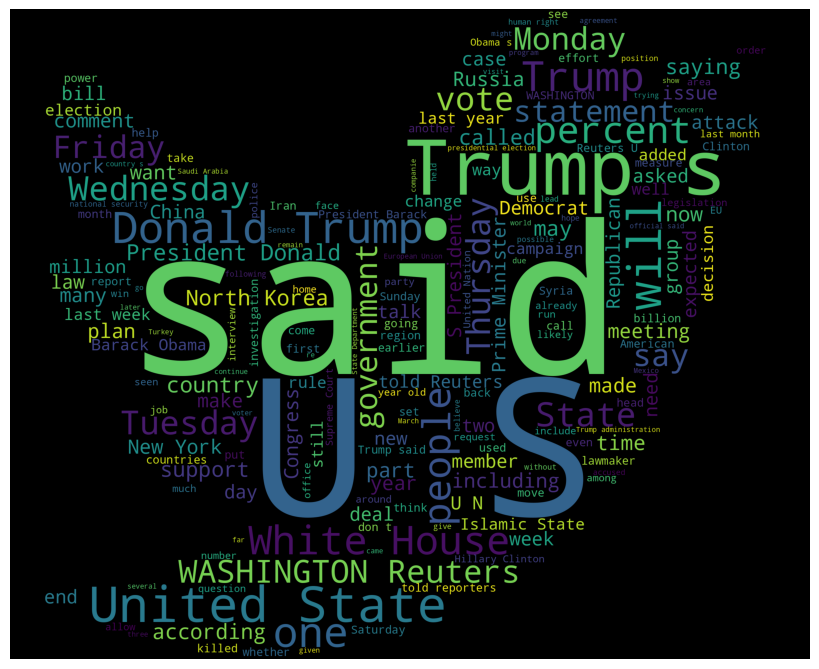

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

WORLDCLOUD FAKE TEXT DATA

In [ ]:
fake_text=" ".join(fake_data["text"].tolist())

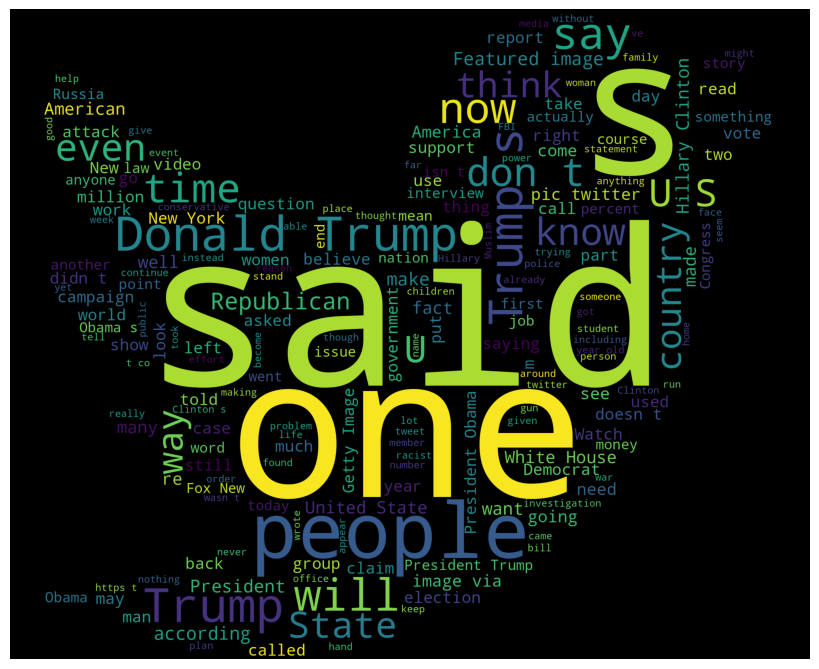

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
fake_data["label"]="fake"
real_data["label"]="real"

In [ ]:
final_data= pd.concat([fake_data,real_data])

In [ ]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [ ]:
final_data.head(10)

,title,text,subject,date,label
0,JUDGE JEANINE RIPS DEMOCRATS: What Have Democr...,The truth is what you get with this judge! We ...,Government News,"Aug 21, 2016",fake
1,Spain's Socialist leader says would back gover...,MADRID (Reuters) - The leader of Spain s Socia...,worldnews,"October 9, 2017",real
2,Conservative ‘Christians’ Get Their Asses Han...,A former evangelical Christian is ripping cons...,News,"January 19, 2017",fake
3,THANKS OBAMA! Half Of Students In Top 700 Scho...,Barack Obama and the Democrat Party were laser...,left-news,"Mar 17, 2017",fake
4,India cenbank says linking national ID number ...,MUMBAI (Reuters) - India s central bank on Sat...,worldnews,"October 21, 2017",real
5,World is losing the battle against climate cha...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"December 12, 2017",real
6,"Haley: Women accusers should be heard, even if...","WASHINGTON (Reuters) - Nikki Haley, the U.S. a...",politicsNews,"December 10, 2017",real
7,BOOM! SARAH HUCKABEE SANDERS Sets Media Straig...,Daily Caller The revelation on Monday that f...,left-news,"Oct 30, 2017",fake
8,BREAKING: Major Health Insurance Carrier May P...,It turns out the words affordable and care ...,Government News,"Nov 19, 2015",fake
9,Republican senator recorded criticizing Trump,WASHINGTON (Reuters) - Republican U.S. Senator...,politicsNews,"July 25, 2017",real


In [ ]:
final_data.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
final_data.drop(["subject","date"], axis=1)

,title,text,label
0,JUDGE JEANINE RIPS DEMOCRATS: What Have Democr...,The truth is what you get with this judge! We ...,fake
1,Spain's Socialist leader says would back gover...,MADRID (Reuters) - The leader of Spain s Socia...,real
2,Conservative ‘Christians’ Get Their Asses Han...,A former evangelical Christian is ripping cons...,fake
3,THANKS OBAMA! Half Of Students In Top 700 Scho...,Barack Obama and the Democrat Party were laser...,fake
4,India cenbank says linking national ID number ...,MUMBAI (Reuters) - India s central bank on Sat...,real
...,...,...,...
44893,WATCH WHAT OUR US MILITARY DOES TO PEDOPHILIC ...,Take that you filthy animals!,fake
44894,Senate confirms Huntsman as ambassador to Russia,WASHINGTON (Reuters) - The U.S. Senate confirm...,real
44895,Trump Goes FULL Propaganda Declaring He Knows...,"Who needs experts, really, when one can rely o...",fake
44896,Five ‘All American’ Football Players Booted F...,"The city of Creston, in the heart of Iowa, sit...",fake


In [ ]:
final_data.head()

,title,text,subject,date,label
0,JUDGE JEANINE RIPS DEMOCRATS: What Have Democr...,The truth is what you get with this judge! We ...,Government News,"Aug 21, 2016",fake
1,Spain's Socialist leader says would back gover...,MADRID (Reuters) - The leader of Spain s Socia...,worldnews,"October 9, 2017",real
2,Conservative ‘Christians’ Get Their Asses Han...,A former evangelical Christian is ripping cons...,News,"January 19, 2017",fake
3,THANKS OBAMA! Half Of Students In Top 700 Scho...,Barack Obama and the Democrat Party were laser...,left-news,"Mar 17, 2017",fake
4,India cenbank says linking national ID number ...,MUMBAI (Reuters) - India s central bank on Sat...,worldnews,"October 21, 2017",real


In [ ]:
final_data.label.value_counts()

,count
label,
fake,23481
real,21417


<Axes: xlabel='label', ylabel='count'>

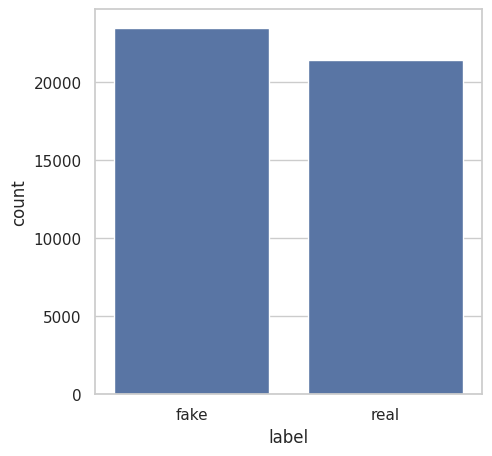

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [ ]:
final_data.head(5)

,title,text,subject,date,label
0,JUDGE JEANINE RIPS DEMOCRATS: What Have Democr...,The truth is what you get with this judge! We ...,Government News,"Aug 21, 2016",fake
1,Spain's Socialist leader says would back gover...,MADRID (Reuters) - The leader of Spain s Socia...,worldnews,"October 9, 2017",real
2,Conservative ‘Christians’ Get Their Asses Han...,A former evangelical Christian is ripping cons...,News,"January 19, 2017",fake
3,THANKS OBAMA! Half Of Students In Top 700 Scho...,Barack Obama and the Democrat Party were laser...,left-news,"Mar 17, 2017",fake
4,India cenbank says linking national ID number ...,MUMBAI (Reuters) - India s central bank on Sat...,worldnews,"October 21, 2017",real


In [ ]:
final_data["text"]=final_data["title"]+final_data["text"]

In [ ]:
final_data=final_data[["text","label"]]

In [ ]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [ ]:
final_data.sample(5)

,text,label
24981,Speaker Ryan says 'black sites' document not f...,1
1847,'Fist bumps' at hedge funds over Trump's tax p...,1
18754,Steve Bannon Promised That There Is ‘No Doubt...,0
24900,Bombshell Report Reveals What Comey REALLY Th...,0
7097,"Swearing in unofficial president is 'treason',...",1


In [ ]:
final_data.label[9943]

np.int64(1)

In [ ]:
final_data.text[36709]

' BREAKING: John McCain Breaks With His Best Senate Friend, Will Vote No On Graham-Cassidy Deathcare Bill (VIDEO)Senator John McCain is battling an aggressive form of brain cancer that will likely kill him, and he knows this. This grave reality seems to have given him a new outlook on his role as a United States Senator. In fact, his lease on life is so new and refreshing that he is going up against his best Senate friend, Senator Lindsey Graham (R-SC). Now that McCain is firmly in the  no  camp, the GOP can only lose one more vote, as Senator Rand Paul (R-KY) is already a hard  no  vote as well.This bill is even more radical than the one McCain killed before, with a drastic move on the Senate Floor as Senate Majority leader Mitch McConnell looked on with his stony turtle face signaling humiliation and rage. On this bill, McCain says: I cannot in good conscience vote for the Graham-Cassidy proposal. Here is the full statement, via Twitter:BREAKING: Sen John McCain comes out in oppositi

In [ ]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
pip install safetensors


In [ ]:
from transformers import BertModel, AutoTokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased', use_safetensors=False)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [ ]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [ ]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [ ]:
maxlen=100

**BERT MODEL CREATION**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer
from tensorflow.keras.models import Model

class BertLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = bert_model

    def call(self, inputs):
        # Ensure inputs are tensors (Keras may sometimes pass tf.Tensor, sometimes lists/arrays)
        input_ids = tf.convert_to_tensor(inputs['input_ids'])
        attention_mask = tf.convert_to_tensor(inputs['attention_mask'])
        outputs = self.bert({'input_ids': input_ids, 'attention_mask': attention_mask})
        return outputs.pooler_output

    def compute_output_shape(self, input_shape):
        # Set the output shape based on the BERT pooler output size
        return (input_shape['input_ids'][0], self.bert.config.hidden_size)

def create_model(bert_model, maxlen=100):
    input_ids = Input(shape=(maxlen,), dtype=tf.int32, name='input_ids')
    attention_mask = Input(shape=(maxlen,), dtype=tf.int32, name='attention_mask')
    bert_layer = BertLayer(bert_model)
    pooled_output = bert_layer({'input_ids': input_ids, 'attention_mask': attention_mask})
    x = Dropout(0.5)(pooled_output)
    x = Dense(64, activation='tanh')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model


In [ ]:
model = create_model(bert_model)

In [ ]:
optimizer = Adam(learning_rate=1e-5, epsilon=1e-8, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # or another metric you want to monitor
    patience=3,  # number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,  # Reduce the learning rate by a factor of 0.1
    patience=3,  # Number of epochs with no improvement to wait before reducing the learning rate
    verbose=1,
    min_lr=1e-6  # Minimum learning rate
)

In [ ]:
import numpy as np
X_train_token['input_ids'] = np.array(X_train_token['input_ids'])
X_train_token['attention_mask'] = np.array(X_train_token['attention_mask'])
X_test_token['input_ids'] = np.array(X_test_token['input_ids'])
X_test_token['attention_mask'] = np.array(X_test_token['attention_mask'])

In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased', use_safetensors=False)


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
history = model.fit(
    x={
        'input_ids': X_train_token['input_ids'],
        'attention_mask': X_train_token['attention_mask']
    },
    y=Y_train,
    epochs=20,
    batch_size=30,
    validation_data=(
        {
            'input_ids': X_test_token['input_ids'],
            'attention_mask': X_test_token['attention_mask']
        },
        Y_test
    ),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
 154/1198 ━━━━━━━━━━━━━━━━━━━━ 3:20:35 12s/step - accuracy: 0.4837 - loss: 0.8581

Accuracy History

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Loss History

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Making Predictions

In [ ]:
y_pred_proba = model.predict({
    'input_ids': X_test_token['input_ids'],
    'attention_mask': X_test_token['attention_mask']
})

# Convert probabilities to binary predictions
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

Confusion Matrix

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred))

In [ ]:
from sklearn.metrics import roc_curve, auc


y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)  # Removed indexing on y_pred_prob
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc


y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10,8))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score


y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)
pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(Y_test, pred)

plt.plot([])
plt.text(0, 0, f'Accuracy Score: {accuracy:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

plt.plot([])
plt.text(0, 0, f'ROC AUC Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, brier_score_loss
import matplotlib.pyplot as plt

# Assuming you have `y_pred_prob` for predicted probabilities and `Y_test` for true labels
pred = (y_pred_prob > 0.5).astype(int)

cohen_kappa = cohen_kappa_score(Y_test, pred)
matthews_corr = matthews_corrcoef(Y_test, pred)
brier_score = brier_score_loss(Y_test, y_pred_prob)

# Plot Cohen's Kappa Score
plt.plot([])
plt.text(0, 0, f'Cohen\'s Kappa Score: {cohen_kappa:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [ ]:
plt.plot([])
plt.text(0, 0, f'Matthews Correlation Coefficient: {matthews_corr:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [ ]:
plt.plot([])
plt.text(0, 0, f'Brier Score Loss: {brier_score:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

log_loss_value = log_loss(Y_test, y_pred_prob)

plt.plot([])
plt.text(0, 0, f'Log Loss: {log_loss_value:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

**CUSTOM DATA PREDICTION**

In [ ]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [ ]:
test_token = tokenize(test_text)

In [ ]:
test_text_pred = np.where(model.predict({
    'input_ids' : test_token['input_ids'],
    'attention_mask' : test_token['attention_mask']
}) >= 0.5, 1, 0)

In [ ]:
test_text_pred

In [ ]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")